# Esercitazione 8: implementazione in pytorch di una rete neurale fully connected, addestrata per task di classificazione e regressione

**Scopo:** familiarizzare con l'implementazione di ANN con la libreria pytorch

**Dataset:** Sloan Digital Sky Survey Dataset
<p>The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.</p>

<table>
  <tr>
    <th><b><em><strong>Feature</strong></em></b></th>
    <th><b><em><strong>Description</strong></em></b></th>
  </tr>
  <tr>
    <td>obj_ID</td>
    <td>Object Identifier, the unique value that identifies the object in the image catalog used by the CAS</td>
  </tr>
  <tr>
    <td>alpha</td>
    <td>Right Ascension angle (at J2000 epoch)</td>
  </tr>
  <tr>
    <td>delta</td>
    <td>Declination angle (at J2000 epoch)</td>
  </tr>
  <tr>
    <td>u</td>
    <td>Ultraviolet filter in the photometric system</td>
  </tr>
  <tr>
    <td>g</td>
    <td>Green filter in the photometric system</td>
  </tr>
  <tr>
    <td>r</td>
    <td>Red filter in the photometric system</td>
  </tr>
  <tr>
    <td>i</td>
    <td>Near Infrared filter in the photometric system</td>
  </tr>
  <tr>
    <td>z</td>
    <td>Infrared filter in the photometric system</td>
  </tr>
  <tr>
    <td>run_ID</td>
    <td>Run Number used to identify the specific scan</td>
  </tr>
  <tr>
    <td>rerun_ID</td>
    <td>Rerun Number to specify how the image was processed</td>
  </tr>
  <tr>
    <td>cam_col</td>
    <td>Camera column to identify the scanline within the run</td>
  </tr>
  <tr>
    <td>field_ID</td>
    <td>Field number to identify each field</td>
  </tr>
  <tr>
    <td>spec_obj_ID</td>
    <td>Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)</td>
  </tr>
  <tr>
    <td>class</td>
    <td>Object class (galaxy, star or quasar object)</td>
  </tr>
  <tr>
    <td>redshift</td>
    <td>Redshift value based on the increase in wavelength</td>
  </tr>
  <tr>
    <td>plate</td>
    <td>Plate ID, identifies each plate in SDSS</td>
  </tr>
  <tr>
    <td>MJD</td>
    <td>Modified Julian Date, used to indicate when a given piece of SDSS data was taken</td>
  </tr>
  <tr>
    <td>fiber_ID</td>
    <td>Fiber ID that identifies the fiber that pointed the light at the focal plane in each observation</td>
  </tr>
</table>

In [58]:
# import delle librerie
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

# pytorch
import torch
import torchvision

print("torch version:",torch.__version__)
print("torchvision version:",torchvision.__version__)

# controlliamo se la GPU è disponibile e nel caso quale tipo di GPU
if torch.cuda.is_available():
  print('Numero di GPU disponibili: ',torch.cuda.device_count())
  for i in range(0,torch.cuda.device_count()):
    print(torch.cuda.get_device_name(i))

# se la GPU è disponibile setto device='cuda', altrimenti 'cpu
device = ('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Computation device: {device}\n")
#device='cpu'

# download del dataset
csv_name="../Astro/star_classification.csv"
pd.read_csv(csv_name, nrows=100000)
display(df)
# printa il numero di esempi in cascuna classe (GALAXY, STAR, Q (QUASAR))
display(df['class'].value_counts())
display(df['class'].value_counts(normalize=False).to_frame().style.bar(color='green'))
df['alpha'].min(), df['alpha'].max(), df['delta'].min(), df['delta'].max()

torch version: 2.3.0
torchvision version: 0.18.0
Numero di GPU disponibili:  1
NVIDIA GeForce RTX 3060
Computation device: cuda



,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1237660961324990699,129.577717,29.045400,25.40071,21.92014,19.56422,18.92485,18.56440,3606,301,2,37,5014978180282601472,GALAXY,0.466485,4454,55536,800
1,1237660961327677828,135.688549,32.365432,19.77462,18.29778,17.87563,17.65845,17.66204,3606,301,2,78,1431191454818002944,GALAXY,0.049568,1271,52974,628
2,1237667431716487418,169.863745,27.798385,24.98477,21.99800,20.30022,18.36460,17.31518,5112,301,6,392,2495097611325827072,STAR,0.000080,2216,53795,376
3,1237654879664079391,216.738615,3.708191,26.25848,21.96200,20.22898,19.71970,19.31304,2190,301,2,232,657531627286587392,GALAXY,0.363028,584,52049,22
4,1237654879666766039,222.879539,3.359325,20.54891,18.77037,17.51467,17.01419,16.62887,2190,301,2,273,662092401451493376,GALAXY,0.183392,588,52045,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1237678858462167557,338.008135,10.561920,24.48312,21.37714,19.31578,18.60311,18.14281,7773,301,2,166,5689412576804622336,GALAXY,0.386626,5053,56213,874
9996,1237678858463478217,341.021801,10.897466,27.03648,22.31284,20.54276,19.57619,19.34742,7773,301,2,186,5690546997557481472,GALAXY,0.509543,5054,56191,905
9997,1237678858456334987,324.651645,9.094834,19.87643,17.83816,16.78296,16.33375,15.95432,7773,301,2,77,4608402968563437568,GALAXY,0.127949,4093,55475,344
9998,1237678858475339925,8.782037,11.940622,20.50445,18.40342,17.27068,16.68340,16.18455,7773,301,2,367,6368274690713341952,GALAXY,0.104559,5656,55940,672


class
GALAXY    6013
STAR      2031
QSO       1956
Name: count, dtype: int64

,count
class,
GALAXY,6013
STAR,2031
QSO,1956


(0.0055278279239701, 359.974291806453, -13.6243266033987, 82.7644209597932)

In [48]:
# trasforma label da string a indice numerico intero (0,1,2)
from sklearn import preprocessing

LE = preprocessing.LabelEncoder()
df['class'] = LE.fit_transform(df['class'])
print(df['class'].value_counts())

temp_df = df
for col in df:
  temp_df = temp_df[ temp_df[col] != -9999.0]
df = temp_df

# calcola pesi per ribilanciare le classi (da usare con la loss BinaryCrossEntropy)
# peso_classe_i = N_tot / (N_classi * N_i) con N_tot # totale eventi,  N_classi #classi,  N_i # eventi nella classe i-esima

cls_w = []
allev = sum(df['class'].value_counts())
for i in range(3):
  cls_w.append(allev/(3*df['class'].value_counts()[i]))
print(cls_w)

class
0    244864
2     80861
1     74275
Name: count, dtype: int64
[0.5445159604012154, 1.7950830707919325, 1.6489969574789125]


In [90]:
# seleziona solo le variabili utili

# per il task di classificazione usiamo come feature 'u', 'g', 'r', 'i', 'z', 'redshift' - e come label "class"
x_cls = df.drop(['obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'plate', 'MJD', 'fiber_ID', 'alpha', 'delta'], axis = 1).values
y_cls = df['class'].values

print(x_cls.shape)
print(y_cls.shape)

# Preprocessamento del dataset

# divisione in train, validation e test dataset (33:33:33)
from sklearn.model_selection import train_test_split

seed=42
x_cls_train, x_cls_split, y_cls_train, y_cls_split = train_test_split(x_cls , y_cls , train_size=0.8, shuffle=True, random_state=seed)
x_cls_vali, x_cls_test, y_cls_vali, y_cls_test = train_test_split(x_cls_split , y_cls_split, test_size=0.5, shuffle=True, random_state=seed)

print(x_cls_train.shape)
print(x_cls_vali.shape)
print(x_cls_test.shape)

# normalizzazione (x-mu)/sdev

# per evitare possibile passaggio di informazione dal dataset di test in quello di training è preferibile normalizzare tutti i dataset
# o usando i parametri del solo traingin dataset, oppure indipendentemente uno dall'altro

# normalizzaiamo i dataset indipendentemente uno dall'altro
sc_cls_train = preprocessing.StandardScaler()
sc_cls_vali = preprocessing.StandardScaler()
sc_cls_test = preprocessing.StandardScaler()

x_cls_train = sc_cls_train.fit_transform(x_cls_train)
x_cls_vali = sc_cls_vali.fit_transform(x_cls_vali)
x_cls_test = sc_cls_test.fit_transform(x_cls_test)

# alternativamente:
# x_cls_train = sc_cls_train.fit_transform(x_cls_train)
# x_cls_vali = sc_cls_train.transform(x_cls_vali)
# x_cls_test = sc_cls_train.transform(x_cls_test)

x_cls_train_pt = torch.tensor(x_cls_train).float()
y_cls_train_pt = torch.tensor(y_cls_train).long() #cuda vuole long int per le label
x_cls_vali_pt = torch.tensor(x_cls_vali).float()
y_cls_vali_pt = torch.tensor(y_cls_vali).long()
x_cls_test_pt = torch.tensor(x_cls_test).float()
y_cls_test_pt = torch.tensor(y_cls_test).long()

print(x_cls_train_pt.shape)
print(y_cls_train_pt.shape)
print(x_cls_vali_pt.shape)
print(y_cls_vali_pt.shape)
print(x_cls_test_pt.shape)
print(y_cls_test_pt.shape)

(399984, 6)
(399984,)
(319987, 6)
(39998, 6)
(39999, 6)
torch.Size([319987, 6])
torch.Size([319987])
torch.Size([39998, 6])
torch.Size([39998])
torch.Size([39999, 6])
torch.Size([39999])


**Normalizzazione delle fetaure in input**: normalizzare l'input permette di usare learnign rate più grandi (e quindi effetturare un training più veloce) oltre a stabilizzare l'addestramento ...

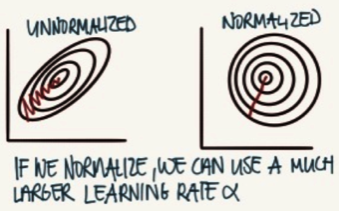

Uso della GPU. Se si ha a disposizione una GPU può essere utilizzata per accelerare le operazioni. Questo richiede di spostare i tensori e il modello di rete neurale sulla GPU quando si effettuano i calcoli. È conveniente controllare se la GPU è disponibile e nel caso settare una variabile opportuna per l'uso successivo.

In [91]:
# per allenare la rete neurale con SGD (stochastic gradient descent), dobbiamo dividere
# il campione di training in mini batch, e eventualmente fare un reshuffling degli eventi ad ongi epoca,
# applicare trasformazioni etc...

# questo viene fatto in pytorch automaticamente tramite delle helper function chiamate
# Data Sets e Data Loaders

# pytorch dataset: premette di accoppiare fietaure e target per ogni evento e di accedere ad ogni coppia del
# dataset

# pytorch dataloader permette di costruire un iterabile python e applicare divisione in mini-batch, shuffling,
# uso di multiprocessing per leggere i dati, applicare data augmentation, etc....

from torch.utils.data import TensorDataset, DataLoader

div = 100
train_batch = int(x_cls_train_pt.shape[0] / div)
vali_batch = int(x_cls_vali_pt.shape[0] / div)
test_batch = int(x_cls_test_pt.shape[0] / div)
subproc = 0
pin_mem = True

# dataset per classificazione
ds_cls_train = TensorDataset(x_cls_train_pt, y_cls_train_pt) # a datset are pair of feature Tensor, target Tensor
dl_cls_train = DataLoader(ds_cls_train, batch_size=train_batch, shuffle=True, num_workers=subproc, drop_last=True, pin_memory=pin_mem)  #the dataset will be shuffled and batched in mini batch of batch event each

ds_cls_vali = TensorDataset(x_cls_vali_pt, y_cls_vali_pt)
dl_cls_vali = DataLoader(ds_cls_vali, batch_size=vali_batch, shuffle=True, num_workers=subproc, drop_last=True, pin_memory=pin_mem)

ds_cls_test = TensorDataset(x_cls_test_pt, y_cls_test_pt)
dl_cls_test = DataLoader(ds_cls_test, batch_size=test_batch, shuffle=True, num_workers=subproc, drop_last=True, pin_memory=pin_mem)

In [52]:
# ogni data loader fornisce un iteratore con il quale si possono accedere ai vari mini-batch del dataset

feat, label = next(iter(dl_cls_train))

print(f"Feature batch shape: {feat.size()}")
print(f"Labels batch shape: {label.size()}")

Feature batch shape: torch.Size([2399, 6])
Labels batch shape: torch.Size([2399])


## PCA

Explained variance comp. 1 -> 0.824614481301772
Explained variance comp. 2 -> 0.13019226317920385
Explained variance comp. 3 -> 0.02135353894690458
Explained variance comp. 4 -> 0.017482420152309452
Explained variance comp. 5 -> 0.003986145146356628
Explained variance comp. 6 -> 0.002371151273453655
Sum of explained varianca for 6 components -> 1.0000000000000002


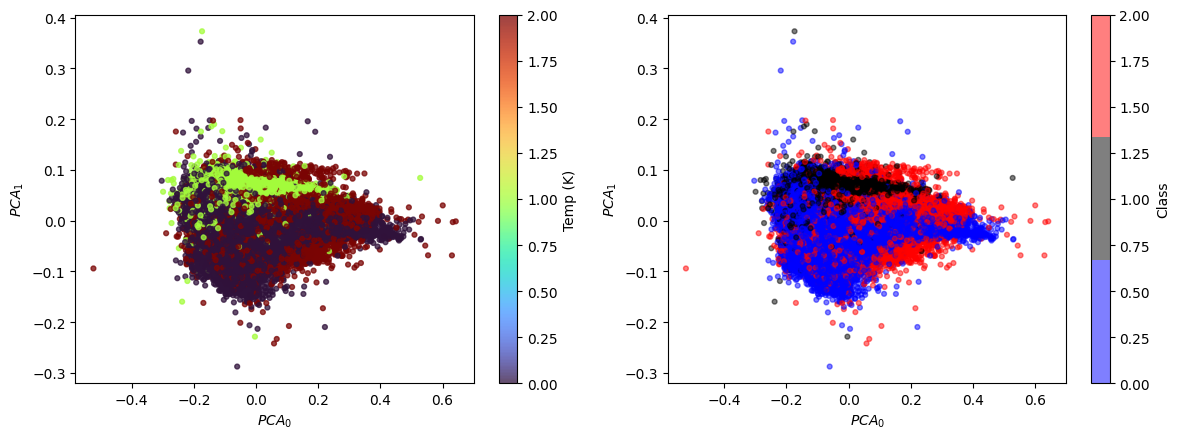

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import colors
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure as pltfigure
import numpy as np

x_cls_norm = (x_cls - x_cls.min())/(x_cls.min() - x_cls.max())

pca = PCA(6)
X_cls_pca = pca.fit_transform(x_cls_norm)
pca_var = pca.explained_variance_ratio_

for i in range(0, len(pca_var)):
    print(f"Explained variance comp. {i+1} -> {pca_var[i]}")
print(f"Sum of explained varianca for {i+1} components -> {pca_var.sum()}")

cmap = colors.ListedColormap(['blue', 'black', 'red'])
                            #  GALAXY,  STAR,  QSR
plt.figure(figsize=(12, 4.5))
plt.subplot(1,2,1)
sc1 = plt.scatter(X_cls_pca[:,0], X_cls_pca[:,1], c=y_cls, cmap='turbo', alpha=0.75, s=12)
plt.colorbar(sc1, label='Temp (K)')
plt.xlabel("${PCA}_0$")
plt.ylabel("${PCA}_1$")

plt.subplot(1,2,2)
sc2 = plt.scatter(X_cls_pca[:,0], X_cls_pca[:,1], c=y_cls, cmap=cmap, alpha=0.5, s=12)
plt.colorbar(sc2, label='Class')
plt.xlabel("${PCA}_0$")
plt.ylabel("${PCA}_1$")

plt.tight_layout()
plt.show()


## Definzione del modello di rete neurale per la classificazione.

Archiettura: MLP con layer densi (Linear in pytorch):
 con 2 layer hidden con attivazioni ReLU, e 3 neuroni di output con attivazione softmax che predicono la probabilità che l'input appartenga ad una delle 3 classi possibili:

*   input layer: 8 neuroni (la dimensione del vettore di input x)
*   primo hidden layer: 128 neuroni, attivazione ReLU
*   secondo hidden layer: 128 neuroni, attivazione ReLU
*   output layer: 3 neuroni, attivazione softmax

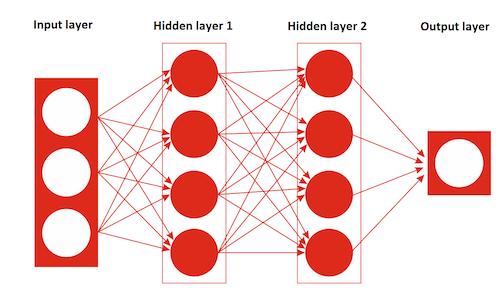

In [92]:
class SaveBestModel:
    def __init__(self, best_valid_loss=float('inf'), file_name='best_model'): #object initialized with best_loss = +infinite
        self.best_valid_loss = best_valid_loss
        self.file_name = file_name
  
    def __call__(
        self, current_valid_loss,
        epoch, model, optimizer, criterion, metric, verbose=False
    ):
        if current_valid_loss < self.best_valid_loss:
            self.best_valid_loss = current_valid_loss

            if verbose:
              print(f"\nBest validation loss: {self.best_valid_loss}")
              print(f"\nSaving best model for epoch: {epoch+1}\n")

            # method to save a model (the state_dict: a python dictionary object that
            # maps each layer to its parameter tensor) and other useful parametrers
            # see: https://pytorch.org/tutorials/beginner/saving_loading_models.html

            torch.save({'model' : model,
                'epoch': epoch+1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': criterion,
                'metric': metric,
                }, self.file_name + '.pt')

In [93]:
from torch import nn
import torch.nn.functional as F

# in pytorch una rete neurale viene implementata costruendo una classe python che eredita
# dalla classe di pytorch nn.Module e implementa due metodi di base:
# __init__: definizione dei layer utlizzati
# forward: funzione che calcola y = ANN(x)

class ShallowMLP(nn.Module):
  def __init__(self, input_dim=6, output_dim=3, hidden_dim=128, layers_dim=1):
    super(ShallowMLP, self).__init__()

    # inizializzazione dei layer/funzioni che utilizzeremo per definire la rete

    #torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)
    self.layer1 = nn.Linear(input_dim, hidden_dim)  #hidden layer
    self.layer2 = nn.Linear(hidden_dim, hidden_dim)
    self.layer3 = nn.Linear(hidden_dim, output_dim) #output layer
    self.layers_dim = layers_dim;
    self.relu = nn.ReLU() # relu function (NOTA: non è obbligatorio definirla qui, è anche possible usare la forma funzionale F.relu() direttamente nel metodo forward())

  def forward(self, x):
    x = self.layer1(x)
    x = self.relu(x) # oppure x = F.relu(x)
    for i in range(self.layers_dim):
      x = self.layer2(x)
      x = self.relu(x)      
    out = self.layer3(x)
    # NOTA: non applichiamo softmax perché la loss nn.CrossEntropyLoss() già lo applica
    # automaticamente al suo interno
    return out

# in pytorch è necessario scriversi il loop di training, cioè il loop sulle epoch di training in cui in ogni
# epoca si leggono tutti gli eventi del dataset aggiornando i pesi dopo ogni mini-batch
import time

def train_model(nn_model, criterion, metric, n_epochs, dl_train, dl_vali, verbose=False):
  # liste su cui salvare il valore della loss e della metrica ad ogni epoca per poterli graficare in funzione
  # dell'epoca a fine addestramento
  hist_loss = []
  hist_metric = []
  hist_vloss = []
  hist_vmetric = []
  epoch_times = []
  # loop sulle epoche
  for epoch in range(n_epochs):
    t0 = time.time()

    # training step (in cui aggiorniamo i pesi della rete neurale)
    nn_model.train()
    train_loss = 0
    train_metric = 0
    acc_tmp = 0
    counter = 0
    for xb, yb in dl_train:
        counter += 1
        xb=xb.to(device) #copio il mini batch di dati sulla CPU/GPU
        yb=yb.to(device)

        pred = nn_model(xb) #predizione del modello

        # calcolo loss e metrica
        loss = criterion(pred, yb)
        if metric != None:
          tmetric = metric(pred, yb)

          # calcolo accuracy a mano (se non si vuole usare trochmetrics)
          pred_class = torch.argmax(pred, 1)
          acc_tmp += (torch.sum(pred_class == yb).float() / yb.nelement())

        # aggiorno la loss e metrica totale
        train_loss += loss.item()
        if metric != None:
          train_metric += tmetric.item()

        # backpropagation
        opt.zero_grad() #resetta i gradienti prima di eseguire la backpropagation (importante!)
        loss.backward() #calcola i gradeinti della loss
        opt.step() #aggiorna i pesi

    train_loss /= counter
    hist_loss.append(train_loss)

    if metric != None:
      train_metric /= counter
      acc_tmp /= counter
      hist_metric.append(train_metric)

    # validation step (non vengono aggiornati i pesi)
    nn_model.eval()
    vali_loss = 0
    vali_metric = 0
    counter = 0
    with torch.no_grad(): #evita che vengano cacolati automaticamente i gradienti
      for xb, yb in dl_vali:
        counter += 1
        xb=xb.to(device)
        yb=yb.to(device)

        pred = nn_model(xb) #predizione del modello

        # calcolo loss e metrica
        vloss = criterion(pred, yb)
        vali_loss += vloss.item()

        if metric != None:
          vmetric = metric(pred, yb)
          vali_metric += vmetric.item()
          
    vali_loss /= counter
    hist_vloss.append(vali_loss)

    if metric != None:
      vali_metric /= counter
      hist_vmetric.append(vali_metric)

    elapsed_time = time.time()-t0
    epoch_times.append(elapsed_time)
    if verbose:
      if metric != None:
        print("epoch: %d, time(s): %.4f, train loss: %.6f, train metric: %.6f, vali loss: %.6f, vali metric: %.6f, train accuracy (manual): %.6f"
              % (epoch+1, elapsed_time, train_loss, train_metric, vali_loss, vali_metric, acc_tmp))
      else:
        print("epoch: %d, time(s): %.4f, train loss: %.6f, vali loss: %.6f"
              % (epoch+1, elapsed_time, train_loss, vali_loss))
    else: 
      print("running epoch: %d" % (epoch+1))
      
    # save best model
    save_best_model(vali_loss, epoch, nn_model, opt, loss_fun, metric_fun, verbose)
    
  return nn_model, hist_loss, hist_metric, hist_vloss, hist_vmetric, epoch_times

## Classificatore

In [94]:
# testiamo un batch del dataset di train sul modello non addestrato per vedere che le cose funzionino
# è sempre una buona idea farlo ...

test_model = ShallowMLP(input_dim=x_cls.shape[1], output_dim=3)

feat, label = next(iter(dl_cls_train))

feat=feat.to(device) #sposto sull device il batch di  dati
label=label.to(device) # sposto sull device il batch di label

test_model.to(device) # sposto il modello sul device

out = test_model(feat) #applico il modello (la rete neurale) agli eventi del batch
test_model = None
print('input della rete neurale: ', feat.shape)
print('output della rete neurale: ', out.shape)
print(out[0]) #nota questi sono i logit di output (eg. non c'è softmax applicato, perché questo viene applicato dentro la loss-function nn.CrossEntropyLoss()

# se volessimo vedere l'output softmax:

print(F.softmax(out, dim=1)[0])    
# verificate che i tre elementi corrispondano a np.exp(out[0][i]) / (np.exp(out[0][0]) + np.exp(out[0][1]) + np.exp(out[0][2]))

input della rete neurale:  torch.Size([3199, 6])
output della rete neurale:  torch.Size([3199, 3])
tensor([-0.0100,  0.0677,  0.0771], device='cuda:0', grad_fn=<SelectBackward0>)
tensor([0.3153, 0.3407, 0.3440], device='cuda:0', grad_fn=<SelectBackward0>)


In [ ]:
#install torchmetrics: collection of useful PyTorch metrics implementations and an easy-to-use API to create custom metrics
%pip install torchmetrics

In [113]:
# inizializziamo il modello
model = ShallowMLP(input_dim=x_cls.shape[1], output_dim=3, hidden_dim=32, layers_dim=1)

# printout del modello
print(model)

# vogliamo usare la GPU quindi spostiamo il modello sulla GPU
model.to(device)

from torchsummary import summary
summary(model, input_size=(1,x_cls.shape[1]), device=device)

# Per completare il modello dobbiamo definire la loss function, le eventuali metriche per monitorare il
# training della rete, e infine l'ottimizzatore

# per il task di classificazione la loss standard è la cross-entropia

# loss function
cls_w_pt = torch.tensor(np.array(cls_w)).float() #to balance classes
cls_w_pt=cls_w_pt.to(device) #move it to device
#loss_func = nn.CrossEntropyLoss(weight=cls_w_pt) #cross entropy loss (loss usata per classificazione multi classe, per problemi binari: BCELoss())
loss_fun = nn.CrossEntropyLoss(cls_w_pt)

# ottmizzatore: usiamo per esempio Adam
from torch import optim
lr = 0.0001
opt = optim.Adam(model.parameters(), lr=lr)
# metrica per monitorare il training: accuracy (multiclasse)

import torchmetrics
from torchmetrics.classification import Accuracy

metric_fun = Accuracy(task="multiclass", num_classes=3)
metric_fun = metric_fun.to(device) #NOTA: va spostata anche essa nel device in cui si esegue il cacolo e sono presenti i tensori (non necessario per le loss std di pytorch)

ShallowMLP(
  (layer1): Linear(in_features=6, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=3, bias=True)
  (relu): ReLU()
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 32]             224
              ReLU-2                [-1, 1, 32]               0
            Linear-3                [-1, 1, 32]           1,056
              ReLU-4                [-1, 1, 32]               0
            Linear-5                 [-1, 1, 3]              99
Total params: 1,379
Trainable params: 1,379
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.01
----------------------------------------------------------------


In [114]:
# numero di epoche
epochs = 30

# istanzia il save_best_model
save_best_model = SaveBestModel(file_name='trained_model')

model, hist_loss, hist_metric, hist_vloss, hist_vmetric, epoch_times = train_model(nn_model=model, criterion=loss_fun, metric=metric_fun, n_epochs=epochs, dl_train=dl_cls_train, dl_vali=dl_cls_vali, verbose=True)
print(f"\naverage time: {np.array(epoch_times).mean():.5f} ± {np.array(epoch_times).std():.5f} ms")

epoch: 1, time(s): 2.5012, train loss: 1.061009, train metric: 0.216424, vali loss: 1.030734, vali metric: 0.254361, train accuracy (manual): 0.216424

Best validation loss: 1.030733766555786

Saving best model for epoch: 1

epoch: 2, time(s): 2.5394, train loss: 0.993867, train metric: 0.387149, vali loss: 0.952093, vali metric: 0.559825, train accuracy (manual): 0.387149

Best validation loss: 0.9520932269096375

Saving best model for epoch: 2

epoch: 3, time(s): 2.5836, train loss: 0.905566, train metric: 0.595102, vali loss: 0.858621, vali metric: 0.615313, train accuracy (manual): 0.595102

Best validation loss: 0.858620572090149

Saving best model for epoch: 3

epoch: 4, time(s): 2.4693, train loss: 0.811590, train metric: 0.629172, vali loss: 0.767244, vali metric: 0.650000, train accuracy (manual): 0.629172

Best validation loss: 0.7672441428899766

Saving best model for epoch: 4

epoch: 5, time(s): 2.5596, train loss: 0.727453, train metric: 0.666389, vali loss: 0.692057, vali

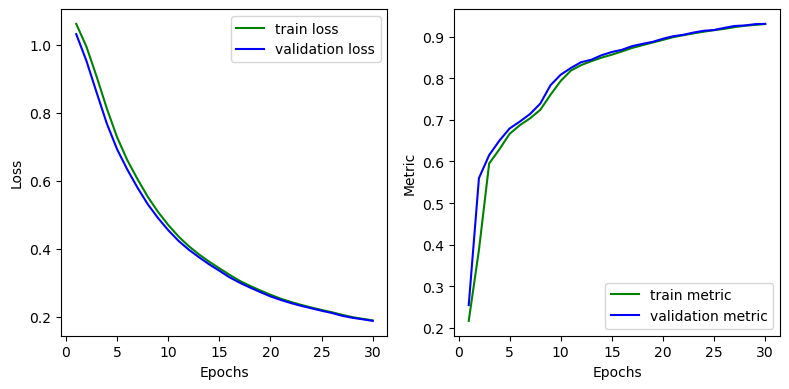

In [116]:

# grafico loss e accuracy vs epoca
plt.figure(figsize=(8, 4))

plt.subplot(1,2,1)
plt.plot(range(1,len(hist_loss)+1), hist_loss, color='green', linestyle='-', label='train loss')
plt.plot(range(1,len(hist_vloss)+1), hist_vloss, color='blue', linestyle='-', label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1,len(hist_metric)+1),hist_metric, color='green', linestyle='-', label='train metric')
plt.plot(range(1,len(hist_vmetric)+1),hist_vmetric, color='blue', linestyle='-', label='validation metric')
plt.xlabel('Epochs')
plt.ylabel('Metric')

plt.tight_layout()
plt.legend()
plt.show()

In [50]:
# Salvataggio del modello

torch.save(model, 'trained_model.pt')

Confusion Matrix:


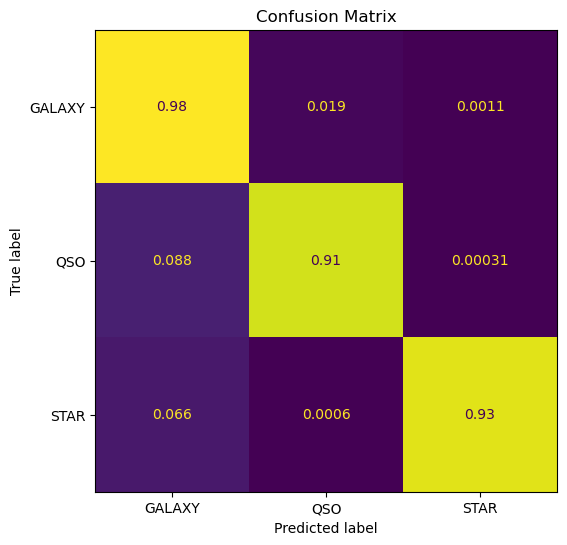

Test loss/accuracy:  0.12562692932784558  /  0.9567567706108093


In [51]:
# Uso di un modello addestrato in inferenza (predizione)

# lettura del modello

model = torch.load('trained_model.pt')
model.eval() #va sempre fatto per settare eventuali layer di droput e batch norm in evaluation model

model.to(device)
metric_fun.to(device)

loss = 0
metric = 0
counter = 0

predictions = np.empty(shape=(0,),dtype=int)
truths = np.empty(shape=(0,),dtype=int)

with torch.no_grad(): #evita che vengano cacolati automaticamente i gradienti
  for xb, yb in dl_cls_test:
    counter += 1
    xb=xb.to(device)
    yb=yb.type(torch.LongTensor).to(device)

    pred = model(xb)

    loss += loss_fun(pred, yb).item()
    metric += metric_fun(pred, yb).item()

    pred = pred.cpu()
    yb = yb.cpu()
    res = torch.argmax(pred, dim=1)

    predictions = np.concatenate((predictions,res.detach().numpy()))
    truths = np.concatenate((truths,yb.detach().numpy()))

  loss /= counter
  metric /= (counter)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = LE.inverse_transform(predictions)
truths = LE.inverse_transform(truths)

c_mat = confusion_matrix(predictions, truths, normalize='true')
print("Confusion Matrix:")

fig, axs = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=c_mat, display_labels=LE.classes_)
disp.plot(ax = axs)
disp.ax_.set_title('Confusion Matrix')
disp.im_.colorbar.remove()
plt.show()
print('Test loss/accuracy: ',loss, ' / ', metric)

## Regressore

In [ ]:
#@title import dati
# per il task di regressione usiamo come feature 'alpha', 'delta', 'u', 'g', 'r', 'z'  - e come target una funzione non lineare di tali misure (solo per scopi didattici)
x_reg = df.drop(['obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'i', 'redshift', 'plate', 'MJD', 'fiber_ID'], axis = 1).values

y_reg = 10 * np.sin(np.pi * x_reg[:,0] * x_reg[:,1]) + 20 * (x_reg[:,2] - 0.5) ** 2 + 10 * x_reg[:,3] + 5 * x_reg[:,4] + 2 * x_reg[:,5]

x_reg = x_reg[y_reg<20000]
y_reg = y_reg[y_reg<20000]
y_reg = y_reg.reshape((-1,1))

print(x_reg.shape)
print(y_reg.shape)

seed=42
x_reg_train,x_reg_test,y_reg_train,y_reg_test = train_test_split(x_reg , y_reg , test_size=0.33, shuffle=True, random_state=seed)
x_reg_train,x_reg_vali,y_reg_train,y_reg_vali = train_test_split(x_reg_train , y_reg_train , test_size=0.5, shuffle=True, random_state=seed)
print(x_reg_train.shape)
print(x_reg_vali.shape)
print(x_reg_test.shape)

sc_reg_train = preprocessing.StandardScaler()
sc_reg_vali = preprocessing.StandardScaler()
sc_reg_test = preprocessing.StandardScaler()


x_reg_train = sc_reg_train.fit_transform(x_reg_train)
x_reg_vali = sc_reg_vali.fit_transform(x_reg_vali)
x_reg_test = sc_reg_test.fit_transform(x_reg_test)

# eliminiamo valori troppo grandi

# per la task di regressione per la funzione scelta il range di variazione del target è molto ampio e questo può
# rendere instabile il training. Conviene noralizzare il target tra -1 e 1

#y_reg_train = 2*y_reg_train - np.min(y_reg_train))/(np.max(y_reg_train)-np.min(y_reg_train))-1.0
#y_reg_vali = 2*y_reg_vali - np.min(y_reg_vali))/(np.max(y_reg_vali)-np.min(y_reg_vali))-1.0
#y_reg_test = 2*y_reg_test - np.min(y_reg_test))/(np.max(y_reg_test)-np.min(y_reg_test))-1.0

x_reg_train_pt = torch.tensor(x_reg_train).float()
y_reg_train_pt = torch.tensor(y_reg_train).float()
x_reg_vali_pt = torch.tensor(x_reg_vali).float()
y_reg_vali_pt = torch.tensor(y_reg_vali).float()
x_reg_test_pt = torch.tensor(x_reg_test).float()
y_reg_test_pt = torch.tensor(y_reg_test).float()

print(x_reg_train_pt.shape)
print(y_reg_train_pt.shape)
print(x_reg_vali_pt.shape)
print(y_reg_vali_pt.shape)
print(x_reg_test_pt.shape)
print(y_reg_test_pt.shape)

batch = 128
subproc = 0
pin_mem = True

# dataset per regressione
ds_reg_train = TensorDataset(x_reg_train_pt, y_reg_train_pt) # a datset are pair of feature Tensor, target Tensor
dl_reg_train = DataLoader(ds_reg_train, batch_size=batch, shuffle=True, num_workers=subproc, drop_last=True, pin_memory=pin_mem)  #the dataset will be shuffled and batched in mini batch of batch event each

ds_reg_vali = TensorDataset(x_reg_vali_pt, y_reg_vali_pt)
dl_reg_vali = DataLoader(ds_reg_vali, batch_size=batch, shuffle=True, num_workers=subproc, drop_last=True, pin_memory=pin_mem)

ds_reg_test = TensorDataset(x_reg_test_pt, y_reg_test_pt)
dl_reg_test = DataLoader(ds_reg_test, batch_size=batch, shuffle=True, num_workers=subproc, drop_last=True, pin_memory=pin_mem)

In [76]:
# proviamo ora a risolvere il task di regressione
# possiamo usare lo stesso modello semplicemente cambiando la loss da CrossEnrtopyLoss a MSE (perchè la softmax nn è stata applicata esplictamente nel modello, ma solo nella loss)

model2 = ShallowMLP(input_dim=6, output_dim=1) #6 input feature e 1 target

loss_fun2 = nn.MSELoss() #MSE

lr = 0.001
opt = optim.Adam(model2.parameters(), lr=lr)
model2.to(device)

ShallowMLP(
  (layer1): Linear(in_features=6, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# numero di epoche
epochs = 10

model2, hist_loss2, hist_metric2, hist_vloss2, hist_vmetric2 = train_model(nn_model=model2, criterion=loss_fun2, metric=None, n_epochs=epochs, dl_train=dl_reg_train, dl_vali=dl_reg_vali)

In [ ]:
# grafico MSE vs epoca
plt.figure(figsize=(10, 7))
plt.plot(range(1,len(hist_loss2)+1), hist_loss2, color='green', linestyle='-', label='train loss')
plt.plot(range(1,len(hist_vloss2)+1), hist_vloss2, color='blue', linestyle='-', label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# plot predicted vs target

model2.eval() #va sempre fatto per settare eventuali layer di droput e batch norm in evaluation model
model2.to('cpu')

loss = 0
metric = 0

true_target=torch.empty(0)
predicted_target=torch.empty(0)

with torch.no_grad(): #evita che vengano cacolati automaticamente i gradienti
  for xb, yb in dl_reg_test:
    pred = model2(xb)
    true_target = torch.cat((true_target, yb), dim=0)
    predicted_target = torch.cat((predicted_target, pred), dim=0)

tr = true_target.numpy()
pr = predicted_target.numpy()

#tr2 = tr[tr<20000]
#pr2 = pr[tr<20000]

tr2 = tr
pr2 = pr

plt.figure(figsize=(5,5))
plt.scatter(tr2, pr2)
plt.plot([2000,20000],[2000,20000], color='black', linewidth=1, linestyle='dashed')
plt.xlabel('true target')
plt.ylabel('predicted target')
plt.show()

In [ ]:
np.max(true_target.numpy())

### Compiti:

*   Matrice di confusione delle 3 label
*   giocate con il codice e i parametri per capire come funziona il tutto, diminuite il numero di neuroni del layer hidden, come decadono le prestazioni della rete in termini di accuracy?
*   provare a cambiare l'attivazione del layer hidden della rete da ReLU a F.tanh o F.sigmoid
*   provare ad aggiungere un secondo e un terzo layer hidden alla rete con 512 neuoroni, come cambiano le prestazioni?
*   provare a giocare con la batch size
*   provare ad eliminare il momentum dall'ottmizzatore SGD e provare diversi valori del learning rate da 0.1 a 0.0001 cosa cambia?
*   provare momemuntum
*   provare a cambiare la funzione di ottimizzazione, usando *torch.optim.Adam* con parametri di default, cosa cambia?

